<a href="https://colab.research.google.com/github/Sam-krish2411/DATA-SCIENCE-ASSIGNMENT/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## K-Nearest Neighbours (KNN) Classification: Animal Type Prediction

### Objective
The goal of this notebook is to implement and evaluate the **K-Nearest Neighbours (KNN)** algorithm for classification tasks. Using a structured dataset containing various features of animals, we aim to predict their **type/class** based on proximity to similar instances in the feature space.

### Dataset Overview
The dataset includes multiple attributes describing animals (e.g., hair, feathers, number of legs, etc.), along with a target label indicating the **animal type**. This is a **multi-class classification** problem where each animal is assigned to one of several predefined categories.

### Why KNN?
KNN is a **non-parametric**, **instance-based** learning algorithm that makes predictions by identifying the most similar training examples (neighbors) in the feature space. It’s intuitive, easy to implement, and often serves as a strong baseline for classification tasks.

### Workflow Summary
- Data loading and preprocessing
- Exploratory Data Analysis (EDA)
- Feature scaling and encoding
- Model training using KNN
- Hyperparameter tuning (e.g., choosing optimal K)
- Evaluation using classification metrics (accuracy, precision, recall, F1-score)
- Visualization of decision boundaries and confusion matrix

---

Let's dive into the implementation and explore how well KNN performs in classifying animal types based on their features.

In [2]:
# Loading the dataset

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Loading the dataset

df = pd.read_csv('Zoo.csv')
df.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [5]:
# Check basic info
print(df.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB
None


In [6]:
#Checking for missing values \
df.isnull().sum()

,0
animal name,0
hair,0
feathers,0
eggs,0
milk,0
airborne,0
aquatic,0
predator,0
toothed,0
backbone,0


In [7]:
#Summary Statistics
df.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


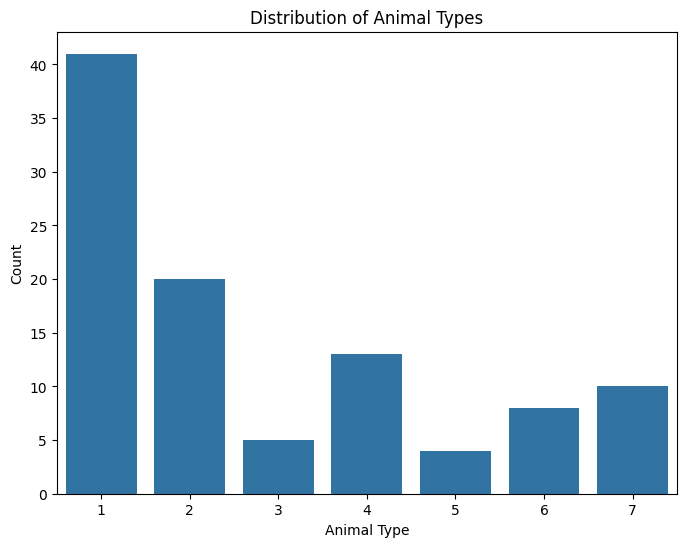

In [8]:
#Visualize the distribution of animal types

plt.figure(figsize=(8,6))
sns.countplot(x='type', data=df)
plt.title('Distribution of Animal Types')
plt.xlabel('Animal Type')
plt.ylabel('Count')
plt.show()

In [13]:
X = df.drop('type', axis=1)  # Features
y = df['type']               # Target

In [15]:
#Converting the target column into a categorical column using LabelEncoder

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['type'] = le.fit_transform(df['type'])

In [17]:
# Convert binary categorical features to 0/1

binary_cols = ['hair', 'feathers', 'eggs', 'milk', 'aquatic', 'predator', 'toothed']
for col in binary_cols:
    df[col] = df[col].replace({'TRUE':1, 'FALSE':0, 'Yes':1, 'No':0})


In [18]:
# use one-hot encoding
categorical_cols = df.select_dtypes(include='object').columns.tolist()
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)


##**2. DATA PREPROCESSING**

In [20]:
# Check for missing values
print(df.isnull().sum())

hair                   0
feathers               0
eggs                   0
milk                   0
airborne               0
                      ..
animal name_wallaby    0
animal name_wasp       0
animal name_wolf       0
animal name_worm       0
animal name_wren       0
Length: 116, dtype: int64


In [22]:
# Separate numeric and categorical columns

numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

In [23]:
# Function to detect outliers

def detect_outliers(df, cols):
    outliers = {}
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5*IQR
        upper_bound = Q3 + 1.5*IQR
        outliers[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col].count()
    return outliers

outliers = detect_outliers(df, numeric_cols)
print("Number of outliers in each numeric column:\n", outliers)

Number of outliers in each numeric column:
 {'hair': np.int64(0), 'feathers': np.int64(20), 'eggs': np.int64(0), 'milk': np.int64(0), 'airborne': np.int64(24), 'aquatic': np.int64(0), 'predator': np.int64(0), 'toothed': np.int64(0), 'backbone': np.int64(18), 'breathes': np.int64(21), 'venomous': np.int64(8), 'fins': np.int64(17), 'legs': np.int64(2), 'tail': np.int64(0), 'domestic': np.int64(13), 'catsize': np.int64(0), 'type': np.int64(0)}


In [24]:
# Cap outliers at lower and upper bounds

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)

In [25]:
# Check summary stats to see if extreme values are handled

print(df.describe())

             hair  feathers        eggs        milk  airborne     aquatic  \
count  101.000000     101.0  101.000000  101.000000     101.0  101.000000   
mean     0.425743       0.0    0.584158    0.405941       0.0    0.356436   
std      0.496921       0.0    0.495325    0.493522       0.0    0.481335   
min      0.000000       0.0    0.000000    0.000000       0.0    0.000000   
25%      0.000000       0.0    0.000000    0.000000       0.0    0.000000   
50%      0.000000       0.0    1.000000    0.000000       0.0    0.000000   
75%      1.000000       0.0    1.000000    1.000000       0.0    1.000000   
max      1.000000       0.0    1.000000    1.000000       0.0    1.000000   

         predator     toothed  backbone  breathes  venomous   fins  \
count  101.000000  101.000000     101.0     101.0     101.0  101.0   
mean     0.554455    0.603960       1.0       1.0       0.0    0.0   
std      0.499505    0.491512       0.0       0.0       0.0    0.0   
min      0.000000    0.000

##**3. SPLITTING THE DATASET AND IMPLEMENTATION**

In [26]:
from sklearn.model_selection import train_test_split

# Separate features and target
X = df.drop('type', axis=1)  # Features
y = df['type']               # Target (already label-encoded)



In [27]:
# Split into 80% training and 20% testing

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (80, 115)
Testing set shape: (21, 115)


In [28]:
#Implement K-Nearest Neighbours (KNN)

#Feature Scaling

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fit on training set, transform both train and test
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [29]:
#Train KNN Classifier
from sklearn.neighbors import KNeighborsClassifier

# Initialize KNN (you can tune n_neighbors later)
k = 5
knn = KNeighborsClassifier(n_neighbors=k)

# Train on training data
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [30]:
# Make Predictions on Test Set

# Predict
y_pred = knn.predict(X_test_scaled)

In [31]:
#Evaluate Model Performance

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt


In [32]:
# Accuracy

print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.8095238095238095


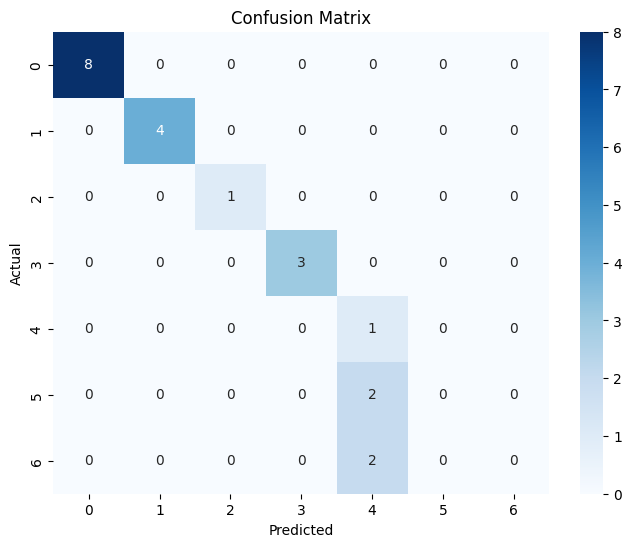

In [33]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [34]:
# Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         3
           4       0.20      1.00      0.33         1
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         2

    accuracy                           0.81        21
   macro avg       0.60      0.71      0.62        21
weighted avg       0.77      0.81      0.78        21



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


##**5. CHOOSING APPROPRIATE DISTANCE METRIC AND K**



In [ ]:
"""
##Choose Distance Metric and Value for K##

1. KNN supports several distance metrics; the most common are:
2. Euclidean (default) – good for continuous features.
3. Manhattan – good if you expect differences to be additive.
4. Minkowski – generalization of Euclidean and Manhattan
"""

In [36]:
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsClassifier


In [38]:
# Try K from 1 to 20
import warnings
warnings.filterwarnings('ignore')

k_range = range(1, 21)
cv_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    scores = cross_val_score(knn, X_train_scaled, y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

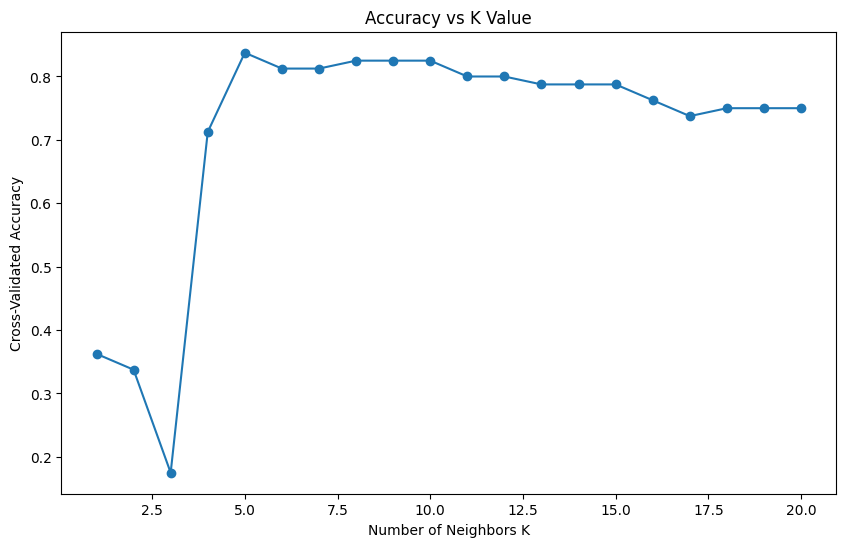

In [39]:
# Plot accuracy vs K
plt.figure(figsize=(10,6))
plt.plot(k_range, cv_scores, marker='o')
plt.xlabel('Number of Neighbors K')
plt.ylabel('Cross-Validated Accuracy')
plt.title('Accuracy vs K Value')
plt.show()

In [40]:
# Best K
best_k = k_range[np.argmax(cv_scores)]
print("Optimal K:", best_k)

Optimal K: 5


##**6. Evaluate Classifier Performance**

In [41]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

In [42]:
# Train KNN with optimal K
knn = KNeighborsClassifier(n_neighbors=best_k, metric='euclidean')
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)

In [43]:
# Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

In [44]:
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

Accuracy: 0.8095
Precision: 0.7714
Recall: 0.8095
F1-score: 0.7778


In [45]:
# Detailed classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         3
           4       0.20      1.00      0.33         1
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         2

    accuracy                           0.81        21
   macro avg       0.60      0.71      0.62        21
weighted avg       0.77      0.81      0.78        21



##**Interpretation: Classification Report**

This report summarizes the performance of a K-Nearest Neighbors (KNN) classifier applied to PCA-reduced data across 7 classes.

### Class-wise Metrics:
| Class | Precision | Recall | F1-Score | Support | Interpretation |
|-------|-----------|--------|----------|---------|----------------|
| 0     | 1.00      | 1.00   | 1.00     | 8       | Perfect classification; all instances correctly identified. |
| 1     | 1.00      | 1.00   | 1.00     | 4       | Excellent performance with no misclassifications. |
| 2     | 1.00      | 1.00   | 1.00     | 1       | Single instance correctly classified. |
| 3     | 1.00      | 1.00   | 1.00     | 3       | Strong performance on a small sample. |
| 4     | 0.20      | 1.00   | 0.33     | 1       | High recall but low precision; classifier predicts class 4 too often. |
| 5     | 0.00      | 0.00   | 0.00     | 2       | Class 5 not detected at all; model fails to identify these instances. |
| 6     | 0.00      | 0.00   | 0.00     | 2       | Similar issue as class 5; no correct predictions. |

### Overall Metrics:
- **Accuracy**: `0.81` → 81% of total predictions are correct.
- **Macro Avg**: Precision `0.60`, Recall `0.71`, F1 `0.62`  
  → Treats all classes equally; highlights poor performance on minority classes.
- **Weighted Avg**: Precision `0.77`, Recall `0.81`, F1 `0.78`  
  → Accounts for class imbalance; dominated by well-performing majority classes.

### Modeling Insights:
- **Class Imbalance**: Classes 2, 4, 5, and 6 have very low support, making them harder to classify accurately.
- **Overfitting to Majority Classes**: Perfect scores for classes 0–3 suggest the model is biased toward well-represented classes.
- **Poor Minority Class Detection**: Classes 5 and 6 are completely missed, indicating a need for better representation or alternative modeling strategies.



##**7. Visualize Decision Boundaries**

In [46]:
from sklearn.decomposition import PCA

In [47]:
# Reduce to 2D
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [48]:
# Train KNN on 2D data for visualization
knn_vis = KNeighborsClassifier(n_neighbors=best_k, metric='euclidean')
knn_vis.fit(X_train_pca, y_train)


KNeighborsClassifier(metric='euclidean')

In [49]:
# Create meshgrid
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))


In [50]:
# Predict for each point in the grid
Z = knn_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

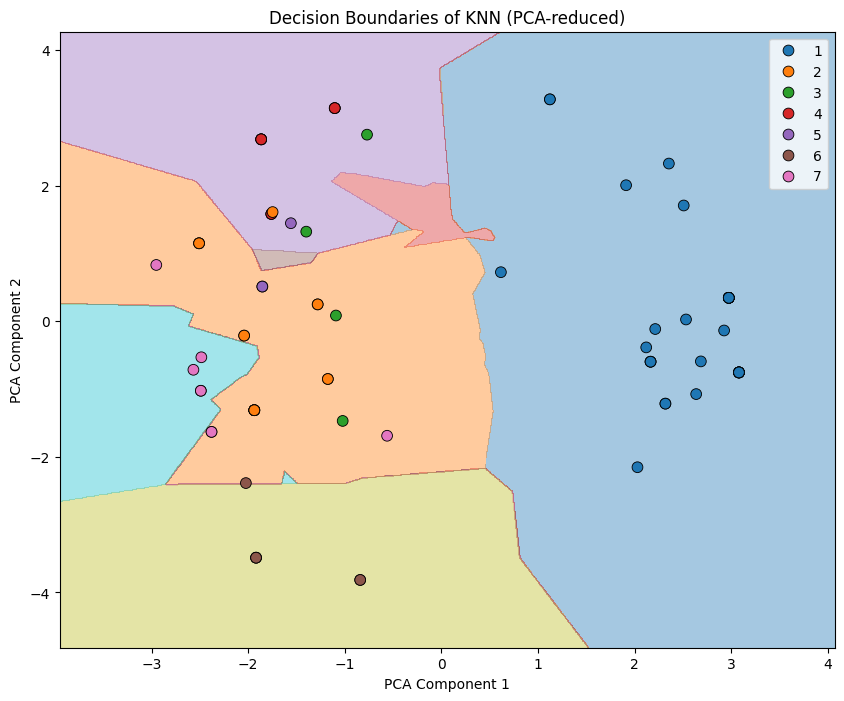

In [51]:
# Plot
plt.figure(figsize=(10,8))
plt.contourf(xx, yy, Z, alpha=0.4, cmap='tab10')
sns.scatterplot(x=X_train_pca[:,0], y=X_train_pca[:,1], hue=le.inverse_transform(y_train),
                palette='tab10', s=60, edgecolor='k')
plt.title('Decision Boundaries of KNN (PCA-reduced)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

## K-Nearest Neighbors (KNN)

### 1. What are the key hyperparameters in KNN?

- **`n_neighbors`**:  
  - Number of nearest neighbors to consider for classification or regression.
  - A smaller value may lead to overfitting; a larger value may smooth out decision boundaries.

- **`weights`**:  
  - Determines how neighbors contribute to the prediction.
    - `'uniform'`: All neighbors have equal weight.
    - `'distance'`: Closer neighbors have more influence.

- **`metric`**:  
  - Defines the distance function used to compute similarity.
  - Common choices include `'minkowski'`, `'euclidean'`, `'manhattan'`, etc.

- **`p` (used with Minkowski distance)**:  
  - Power parameter:
    - `p=1`: Manhattan distance
    - `p=2`: Euclidean distance

- **`algorithm`**:  
  - Method used to compute nearest neighbors:
    - `'auto'`, `'ball_tree'`, `'kd_tree'`, `'brute'`
  - Affects computational efficiency, especially with large datasets.

- **`leaf_size`** (for tree-based algorithms):  
  - Impacts speed and memory usage during neighbor search.

---

### 2. What distance metrics can be used in KNN?

- **Euclidean Distance** (`p=2`):  
  - Most common; measures straight-line distance between points.

- **Manhattan Distance** (`p=1`):  
  - Sum of absolute differences; useful for grid-like data.

- **Minkowski Distance**:  
  - Generalized form; controlled by parameter `p`.

- **Chebyshev Distance**:  
  - Maximum absolute difference across dimensions.

- **Cosine Similarity**:  
  - Measures angle between vectors; useful for text or high-dimensional sparse data.

- **Hamming Distance**:  
  - Used for categorical or binary features.

- **Mahalanobis Distance**:  
  - Accounts for feature correlation; requires covariance matrix.

---
